In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('E:\syntax code\python\jupytr\dataset\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
count_0,count_1=df.Outcome.value_counts()
df_0=df[df['Outcome'] == 0]
df_1=df[df['Outcome'] == 1]
df_under_0=df_0.sample(count_1)
df_test_under=pd.concat([df_under_0,df_1],axis=0)

print('Random Under-Sampling')
print(df_test_under.Outcome.value_counts())

Random Under-Sampling
0    268
1    268
Name: Outcome, dtype: int64


In [5]:
df_test_under

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
95,6,144,72,27,228,33.9,0.255,40,0
513,2,91,62,0,0,27.3,0.525,22,0
456,1,135,54,0,0,26.7,0.687,62,0
20,3,126,88,41,235,39.3,0.704,27,0
163,2,100,64,23,0,29.7,0.368,21,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [17]:
X=df_test_under.drop(columns='Outcome',axis=1)
y=df_test_under['Outcome']

Model ANN FIXXX


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import tensorflow as tf 

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Normalisasi data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Membuat model Artificial Neural Network (ANN) dengan perubahan
model_ann = Sequential([
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=72, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='softmax')
])

# Compile model dengan optimizer RMSprop dan learning rate yang mungkin perlu disesuaikan
model_ann.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='Adam', metrics=['accuracy'])

# Melatih model
finalann = model_ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

#model_ann.save('diabetes_ANN.h5')
# Evaluasi model
loss, accuracy = model_ann.evaluate(X_test, y_test)

# Prediksi
y_pred_prob = model_ann.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)





y_pred_binary = (y_pred > 0.5).astype(int)
# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: {}".format(f1))



# Pastikan y_test dan y_pred adalah array satu dimensi
y_test_single_dim = y_test.ravel()
y_pred_single_dim = y_pred_binary.ravel()
# Menampilkan classification report
print(classification_report(y_test_single_dim, y_pred_single_dim))


Epoch 1/100
14/14 [==============================] - 1s 26ms/step - loss: 1.1965 - accuracy: 0.5304 - val_loss: 1.0673 - val_accuracy: 0.6389
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.1202 - accuracy: 0.5280 - val_loss: 1.0016 - val_accuracy: 0.7407
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.5444 - val_loss: 0.9557 - val_accuracy: 0.7963
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.5327 - val_loss: 0.9192 - val_accuracy: 0.7870
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9973 - accuracy: 0.6168 - val_loss: 0.8857 - val_accuracy: 0.7963
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9884 - accuracy: 0.6262 - val_loss: 0.8522 - val_accuracy: 0.8519
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9620 - accuracy: 0.6168 - val_loss: 0.8250 - val_accuracy: 0.8426
Epoch 8/100


In [19]:
X_test.shape

(108, 8)

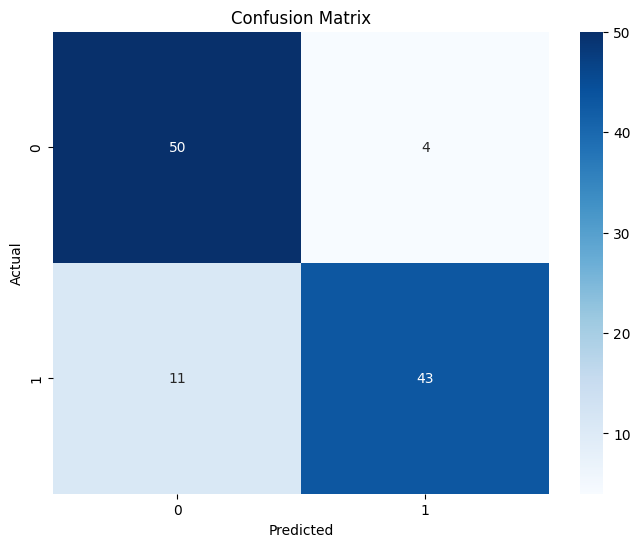

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_encoded = le.fit_transform(y_test_labels)

# Kemudian, gunakan LabelEncoder
y_pred_encoded = le.transform(y_pred_labels)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
model_ann.save_weights('weights_ann_new.keras')